<hr><center> <h1>Target Marketing for <font color='289C4E'>TD Bank<font><a class='anchor' id='top'></a></h1></center><hr>


Sai Ram , Nivedini ,Preet, Mahak ,Darshan

<hr> 
> <center><img src="https://cdn-res.keymedia.com/cms/images/ca/118/0348_637165781376776848.jpg" width=800 ></center>
<hr>


# <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>

- [1. Introduction](#1)

- [2. Loading Libraries](#2)

- [3. Exploratory Data Analysis](#3)

- [4. Data Preparation](#4)

- [5. Models](#5)<br>
    - [ a. Decision Tree ](#5.1)<br> 
    - [ b. Decision tree with search estimator 4](#5.4)<br>
    - [ c. Random Forest Classification](#5.7)<br>
    - [ d. Ada Boosting Classifier](#5.8)<br>
    - [ e. Logistic Regression](#6.1)<br>

- [6. Conclusion](#6.2)
<br><br><br><br><br>

<a id="1"></a> <br>
<hr><center><strong><h1> <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a></h1></strong><center><hr>
<span style="font-size:12pt; font-family:'Comic Sans MS', 'Chalkboard SE', 'Comic Neue', sans-serif; color:#FFFFF; font-weight:bold; ">Welcome to the Target Marketing for Canadian Bank project notebook. In this project, we will be working with data from a Canadian bank to develop a targeted marketing campaign that aims to increase deposit balances. By analyzing customer data and identifying key characteristics, we will create a custom marketing plan designed to reach those customers who are most likely to respond positively to our campaign. </br></br>Using advanced analytical techniques and algorithms, we will explore the dataset to uncover patterns and insights about Canadian bank customers. By leveraging these insights, we can design targeted marketing messages that resonate with our target audience and improve the effectiveness of our campaign.</br></br>This project provides an excellent opportunity to apply your skills in data analysis, machine learning, and marketing strategy to solve a real-world problem for a major financial institution. Let's get started and see what insights we can uncover! </span>

<a id="2"></a> <br>
<hr><center><strong><h1><font color='289C4E'>Libraries<font><a class='anchor' id='top'></a></h1></strong><center><hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing, neighbors
from scipy.stats import reciprocal, uniform



pd.set_option('display.max_columns', None)

<a id="3"></a> <br>
<hr><center><strong><h1><font color='289C4E'>Exploratory Data Analysis<font><a class='anchor' id='top'></a></h1></strong><center><hr>

In [2]:
#Loading our dataset into notebook
df = pd.read_csv(r"/kaggle/input/target-marketing-for-canadian-bank-2023w-aml1413/train.csv")
df_test = pd.read_csv(r"/kaggle/input/target-marketing-for-canadian-bank-2023w-aml1413/test.csv")

In [3]:
df

,Customer_id,Target,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ExternalAccount7,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
0,CTSP000001,0,43824.59,0,0,0,0,0,0,0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
1,CTSP000002,1,11256.21,0,0,0,0,0,0,0,0.00,0.00,0.0,8525.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,11,3,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
2,CTSP000003,1,18795.11,0,1,1,0,0,0,0,13422.35,800.00,0.0,0.0,0.00,13123.28,0.0,0.0,0.0,0,0,0,0,0,0,0,6,0,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
3,CTSP000004,0,22274.72,0,0,0,0,0,0,0,0.00,0.00,0.0,1000.0,23900.00,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,14,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
4,CTSP000005,0,47923.40,0,1,0,0,0,0,0,0.00,0.00,0.0,0.0,2000.00,27629.11,0.0,0.0,0.0,0,1,0,0,0,0,0,2,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63994,CTSP063995,0,40444.92,0,0,1,0,1,0,0,0.00,747.18,0.0,0.0,11496.44,22242.00,0.0,0.0,0.0,0,1,0,0,1,0,0,4,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
63995,CTSP063996,0,47395.91,0,0,0,0,0,0,0,0.00,0.00,0.0,300.0,0.00,0.00,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
63996,CTSP063997,1,10086.31,0,0,1,0,0,0,0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
63997,CTSP063998,0,26452.64,0,0,0,0,0,0,0,0.00,0.00,0.0,14300.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,2,3,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125


In [4]:
# display the first 5 rows of the DataFrame
df.head()

,Customer_id,Target,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ExternalAccount7,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
0,CTSP000001,0,43824.59,0,0,0,0,0,0,0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
1,CTSP000002,1,11256.21,0,0,0,0,0,0,0,0.00,0.0,0.0,8525.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,11,3,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
2,CTSP000003,1,18795.11,0,1,1,0,0,0,0,13422.35,800.0,0.0,0.0,0.0,13123.28,0.0,0.0,0.0,0,0,0,0,0,0,0,6,0,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
3,CTSP000004,0,22274.72,0,0,0,0,0,0,0,0.00,0.0,0.0,1000.0,23900.0,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,14,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
4,CTSP000005,0,47923.40,0,1,0,0,0,0,0,0.00,0.0,0.0,0.0,2000.0,27629.11,0.0,0.0,0.0,0,1,0,0,0,0,0,2,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375


In [5]:
# display the column names of the DataFrame
print(df.columns)

# iterate through the column names and print each name
for i in df.columns:
    print(i)

Index(['Customer_id', 'Target', 'Balance', 'PreviousCampaignResult',
       'Product1', 'Product2', 'Product3', 'Product4', 'Product5', 'Product6',
       'Transaction1', 'Transaction2', 'Transaction3', 'Transaction4',
       'Transaction5', 'Transaction6', 'Transaction7', 'Transaction8',
       'Transaction9', 'ExternalAccount1', 'ExternalAccount2',
       'ExternalAccount3', 'ExternalAccount4', 'ExternalAccount5',
       'ExternalAccount6', 'ExternalAccount7', 'ActivityIndicator',
       'RegularInteractionIndicator', 'CompetitiveRate1', 'CompetitiveRate2',
       'CompetitiveRate3', 'CompetitiveRate4', 'CompetitiveRate5',
       'CompetitiveRate6', 'CompetitiveRate7', 'RateBefore', 'ReferenceRate'],
      dtype='object')
Customer_id
Target
Balance
PreviousCampaignResult
Product1
Product2
Product3
Product4
Product5
Product6
Transaction1
Transaction2
Transaction3
Transaction4
Transaction5
Transaction6
Transaction7
Transaction8
Transaction9
ExternalAccount1
ExternalAccount2
ExternalAcc

In [6]:
# create a new Series 'y' from the Target column of the DataFrame
y = df['Target']

In [7]:
# fig = plt.figure(figsize=(14,15))
# for index,col in enumerate(x):
#     plt.subplot(6,3,index+1)
#     sns.boxplot(y=col, data=x.dropna())
#     plt.grid()
# fig.tight_layout(pad=1.0)

In [8]:
# display summary statistics of the DataFrame
print(df.describe())

             Target       Balance  PreviousCampaignResult      Product1  \
count  63999.000000  63999.000000            63999.000000  63999.000000   
mean       0.499773  22697.014218                0.001484      0.200441   
std        0.500004  10819.489043                0.039303      0.400333   
min        0.000000  10000.000000                0.000000      0.000000   
25%        0.000000  13499.005000                0.000000      0.000000   
50%        0.000000  19982.570000                0.000000      0.000000   
75%        1.000000  30104.035000                0.000000      0.000000   
max        1.000000  50000.000000                2.000000      1.000000   

           Product2      Product3      Product4      Product5      Product6  \
count  63999.000000  63999.000000  63999.000000  63999.000000  63999.000000   
mean       0.160456      0.001766      0.092158      0.022125      0.041876   
std        0.367031      0.041983      0.289251      0.147092      0.200307   
min     

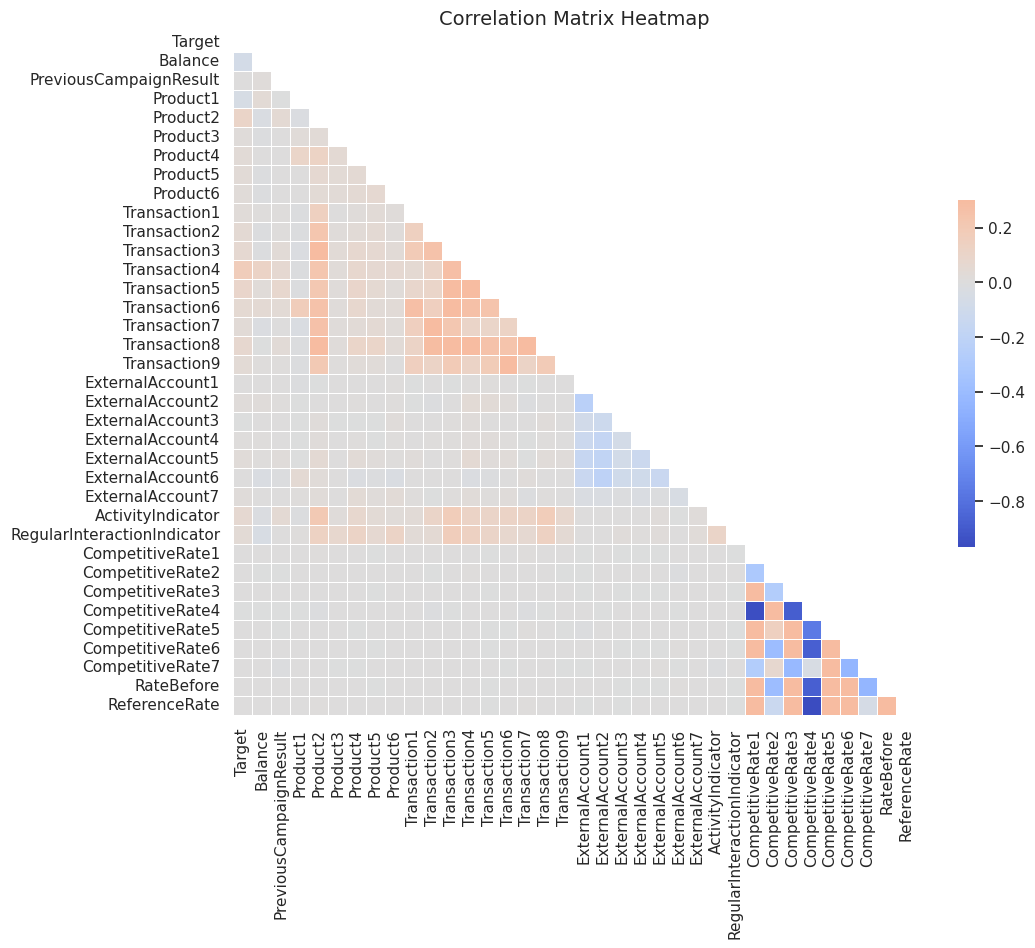

In [9]:
# create a heatmap of the correlation matrix of the DataFrame
sns.set(style='white')
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.color_palette('coolwarm', as_cmap=True)
sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.show()

In [10]:
# calculate the correlation between each column and the Target column
correlations = df.corrwith(df['Target'])

# print the resulting correlations
print(correlations)

Target                         1.000000
Balance                       -0.074225
PreviousCampaignResult         0.002800
Product1                      -0.048796
Product2                       0.105820
Product3                       0.013046
Product4                       0.030936
Product5                       0.030449
Product6                       0.025681
Transaction1                   0.025950
Transaction2                   0.044000
Transaction3                   0.059073
Transaction4                   0.167652
Transaction5                   0.086952
Transaction6                   0.055174
Transaction7                   0.034107
Transaction8                   0.069925
Transaction9                   0.042123
ExternalAccount1              -0.001033
ExternalAccount2               0.015137
ExternalAccount3              -0.004407
ExternalAccount4               0.009470
ExternalAccount5               0.026847
ExternalAccount6              -0.000940
ExternalAccount7               0.021409


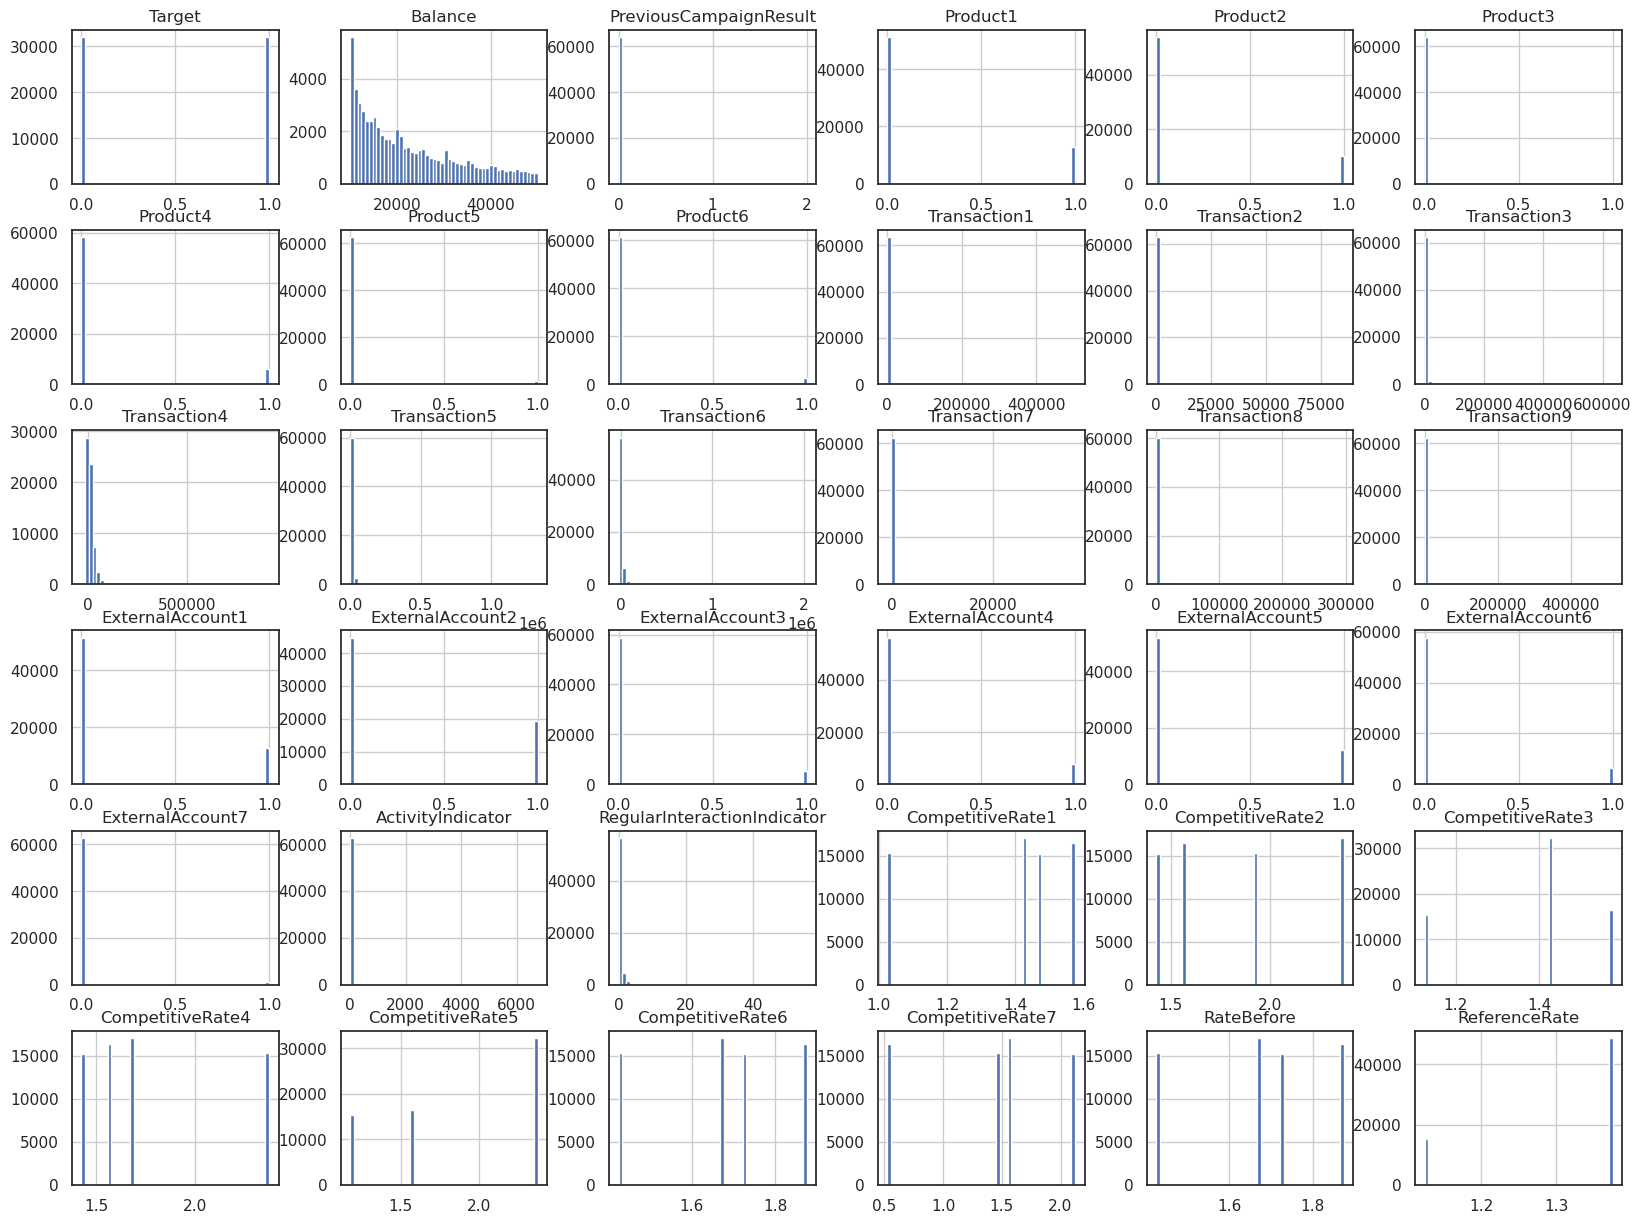

In [11]:
# display the histogram
df.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
# Loop through all columns in a Pandas DataFrame called `df`
for i in df.columns:
    # Print the column name and the count of unique values in that column
    print(i, df[i].value_counts())

Customer_id CTSP000001    1
CTSP042672    1
CTSP042659    1
CTSP042660    1
CTSP042661    1
             ..
CTSP021339    1
CTSP021340    1
CTSP021341    1
CTSP021342    1
CTSP063999    1
Name: Customer_id, Length: 63999, dtype: int64
Target 0    32014
1    31985
Name: Target, dtype: int64
Balance 10000.00    70
20000.00    32
25000.00    26
50000.00    22
15000.00    20
            ..
11939.70     1
30748.24     1
19051.68     1
19138.20     1
13341.55     1
Name: Balance, Length: 62830, dtype: int64
PreviousCampaignResult 0    63906
1       91
2        2
Name: PreviousCampaignResult, dtype: int64
Product1 0    51171
1    12828
Name: Product1, dtype: int64
Product2 0    53730
1    10269
Name: Product2, dtype: int64
Product3 0    63886
1      113
Name: Product3, dtype: int64
Product4 0    58101
1     5898
Name: Product4, dtype: int64
Product5 0    62583
1     1416
Name: Product5, dtype: int64
Product6 0    61319
1     2680
Name: Product6, dtype: int64
Transaction1 0.00        62143
100

In [13]:
df.shape

(63999, 37)

In [14]:
df

,Customer_id,Target,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ExternalAccount7,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
0,CTSP000001,0,43824.59,0,0,0,0,0,0,0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
1,CTSP000002,1,11256.21,0,0,0,0,0,0,0,0.00,0.00,0.0,8525.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,11,3,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
2,CTSP000003,1,18795.11,0,1,1,0,0,0,0,13422.35,800.00,0.0,0.0,0.00,13123.28,0.0,0.0,0.0,0,0,0,0,0,0,0,6,0,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
3,CTSP000004,0,22274.72,0,0,0,0,0,0,0,0.00,0.00,0.0,1000.0,23900.00,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,14,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
4,CTSP000005,0,47923.40,0,1,0,0,0,0,0,0.00,0.00,0.0,0.0,2000.00,27629.11,0.0,0.0,0.0,0,1,0,0,0,0,0,2,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63994,CTSP063995,0,40444.92,0,0,1,0,1,0,0,0.00,747.18,0.0,0.0,11496.44,22242.00,0.0,0.0,0.0,0,1,0,0,1,0,0,4,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
63995,CTSP063996,0,47395.91,0,0,0,0,0,0,0,0.00,0.00,0.0,300.0,0.00,0.00,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
63996,CTSP063997,1,10086.31,0,0,1,0,0,0,0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
63997,CTSP063998,0,26452.64,0,0,0,0,0,0,0,0.00,0.00,0.0,14300.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,2,3,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125


In [15]:
# Calculate the total products for each row
df['total_products'] = (df['Product1']+df['Product2']+df['Product3']+df['Product4']+df['Product5']+df['Product6']).astype(int)

In [16]:
# Count the unique values in the 'total_products' column
df['total_products'].value_counts()

0    37972
1    20059
2     4901
3      940
4      112
5       15
Name: total_products, dtype: int64

In [17]:
# Calculate the total external accounts for each row
df['ExternalAccounts'] = (df['ExternalAccount1']+df['ExternalAccount2']+df['ExternalAccount3']+df['ExternalAccount4']+df['ExternalAccount5']+df['ExternalAccount6']+df['ExternalAccount7']).astype(int)

In [18]:
# Count the unique values in the 'ExternalAccounts' column
df['ExternalAccounts'].value_counts()

1    49945
2     6797
0     6744
3      513
Name: ExternalAccounts, dtype: int64

In [19]:
# Calculate the mean transaction value for each row
df['Transaction_mean'] = (df['Transaction1']+df['Transaction2']+df['Transaction3']+df['Transaction4']+df['Transaction5']+df['Transaction6']+df['Transaction7']+df['Transaction8']+df['Transaction9']/9).astype(int)

In [20]:
# Count the unique values in the 'Transaction_mean' column
df['Transaction_mean'].value_counts()

0        11231
5000      1071
10000      870
600        684
3000       583
         ...  
9804         1
28996        1
20248        1
27496        1
34485        1
Name: Transaction_mean, Length: 24278, dtype: int64

In [21]:
# Calculate the correlation coefficients between each column and the 'Target' column
df.corrwith(df['Target'])

Target                         1.000000
Balance                       -0.074225
PreviousCampaignResult         0.002800
Product1                      -0.048796
Product2                       0.105820
Product3                       0.013046
Product4                       0.030936
Product5                       0.030449
Product6                       0.025681
Transaction1                   0.025950
Transaction2                   0.044000
Transaction3                   0.059073
Transaction4                   0.167652
Transaction5                   0.086952
Transaction6                   0.055174
Transaction7                   0.034107
Transaction8                   0.069925
Transaction9                   0.042123
ExternalAccount1              -0.001033
ExternalAccount2               0.015137
ExternalAccount3              -0.004407
ExternalAccount4               0.009470
ExternalAccount5               0.026847
ExternalAccount6              -0.000940
ExternalAccount7               0.021409


In [22]:
# Filter the DataFrame to include only rows where total_products=0, ExternalAccounts=0, and Transaction_mean=0
x_s = df[(df["total_products"]==0) & (df['ExternalAccounts'] == 0) &(df['Transaction_mean'] == 0)]

In [23]:
x_s

,Customer_id,Target,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ExternalAccount7,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate,total_products,ExternalAccounts,Transaction_mean
0,CTSP000001,0,43824.59,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125,0,0,0
15,CTSP000016,0,16020.72,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,2,0,1.575,1.575,1.575,1.575,1.575,1.875,0.525,1.875,1.375,0,0,0
56,CTSP000057,0,33084.20,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375,0,0,0
57,CTSP000058,0,11760.37,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.575,1.575,1.575,1.575,1.575,1.875,0.525,1.875,1.375,0,0,0
109,CTSP000110,0,30223.09,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63806,CTSP063807,0,10304.66,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.575,1.575,1.575,1.575,1.575,1.875,0.525,1.875,1.375,0,0,0
63819,CTSP063820,0,37026.64,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125,0,0,0
63821,CTSP063822,1,15514.38,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,2,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125,0,0,0
63899,CTSP063900,1,42442.04,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1.575,1.575,1.575,1.575,1.575,1.875,0.525,1.875,1.375,0,0,0


In [24]:
# Drop the specified columns from the DataFrame
df.drop(columns = ['PreviousCampaignResult','ExternalAccount7','Transaction1','Product6','Product5','Product3','Customer_id'], axis = 1,inplace=True)

In [25]:
df

,Target,Balance,Product1,Product2,Product4,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate,total_products,ExternalAccounts,Transaction_mean
0,0,43824.59,0,0,0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125,0,0,0
1,1,11256.21,0,0,0,0.00,0.0,8525.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,1,11,3,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375,0,1,8525
2,1,18795.11,1,1,0,800.00,0.0,0.0,0.00,13123.28,0.0,0.0,0.0,0,0,0,0,0,0,6,0,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375,2,0,27345
3,0,22274.72,0,0,0,0.00,0.0,1000.0,23900.00,0.00,0.0,0.0,0.0,0,0,0,0,0,1,14,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375,0,1,24900
4,0,47923.40,1,0,0,0.00,0.0,0.0,2000.00,27629.11,0.0,0.0,0.0,0,1,0,0,0,0,2,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375,1,1,29629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63994,0,40444.92,0,1,1,747.18,0.0,0.0,11496.44,22242.00,0.0,0.0,0.0,0,1,0,0,1,0,4,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375,2,2,34485
63995,0,47395.91,0,0,0,0.00,0.0,300.0,0.00,0.00,0.0,0.0,0.0,0,0,1,0,0,0,0,1,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125,0,1,300
63996,1,10086.31,0,1,0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125,1,1,0
63997,0,26452.64,0,0,0,0.00,0.0,14300.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,2,3,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125,0,0,14300


In [26]:
columns_predictors = [col for col in df.columns]

<a id="4"></a> <br>
<hr><center><strong><h1><font color='289C4E'>Data Preparation<font><a class='anchor' id='top'></a></h1></strong><center><hr>

In [27]:
df

,Target,Balance,Product1,Product2,Product4,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate,total_products,ExternalAccounts,Transaction_mean
0,0,43824.59,0,0,0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125,0,0,0
1,1,11256.21,0,0,0,0.00,0.0,8525.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,1,11,3,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375,0,1,8525
2,1,18795.11,1,1,0,800.00,0.0,0.0,0.00,13123.28,0.0,0.0,0.0,0,0,0,0,0,0,6,0,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375,2,0,27345
3,0,22274.72,0,0,0,0.00,0.0,1000.0,23900.00,0.00,0.0,0.0,0.0,0,0,0,0,0,1,14,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375,0,1,24900
4,0,47923.40,1,0,0,0.00,0.0,0.0,2000.00,27629.11,0.0,0.0,0.0,0,1,0,0,0,0,2,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375,1,1,29629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63994,0,40444.92,0,1,1,747.18,0.0,0.0,11496.44,22242.00,0.0,0.0,0.0,0,1,0,0,1,0,4,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375,2,2,34485
63995,0,47395.91,0,0,0,0.00,0.0,300.0,0.00,0.00,0.0,0.0,0.0,0,0,1,0,0,0,0,1,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125,0,1,300
63996,1,10086.31,0,1,0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125,1,1,0
63997,0,26452.64,0,0,0,0.00,0.0,14300.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,2,3,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125,0,0,14300


In [28]:
# Selecting columns to use as predictors and target variable
y = df['Target']
x = df.drop(columns=['Target'])

# Splitting dataset into training and testing sets
# Using stratified sampling based on the target variable for splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10086, stratify=y) #stratified sampling based on the target

# Printing the shapes of training and testing data to verify the split
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (47999, 32)
X_test.shape: (16000, 32)
y_train.shape: (47999,)
y_test.shape: (16000,)


In [29]:
df.columns

Index(['Target', 'Balance', 'Product1', 'Product2', 'Product4', 'Transaction2',
       'Transaction3', 'Transaction4', 'Transaction5', 'Transaction6',
       'Transaction7', 'Transaction8', 'Transaction9', 'ExternalAccount1',
       'ExternalAccount2', 'ExternalAccount3', 'ExternalAccount4',
       'ExternalAccount5', 'ExternalAccount6', 'ActivityIndicator',
       'RegularInteractionIndicator', 'CompetitiveRate1', 'CompetitiveRate2',
       'CompetitiveRate3', 'CompetitiveRate4', 'CompetitiveRate5',
       'CompetitiveRate6', 'CompetitiveRate7', 'RateBefore', 'ReferenceRate',
       'total_products', 'ExternalAccounts', 'Transaction_mean'],
      dtype='object')

In [30]:
final_col = ['Balance', 'Product1', 'Product2', 'Product4', 'Transaction2',
       'Transaction3', 'Transaction4', 'Transaction5', 'Transaction6',
       'Transaction7', 'Transaction8', 'Transaction9', 'ExternalAccount1',
       'ExternalAccount2', 'ExternalAccount3', 'ExternalAccount4',
       'ExternalAccount5', 'ExternalAccount6', 'ActivityIndicator',
       'RegularInteractionIndicator', 'CompetitiveRate1', 'CompetitiveRate2',
       'CompetitiveRate3', 'CompetitiveRate4', 'CompetitiveRate5',
       'CompetitiveRate6', 'CompetitiveRate7', 'RateBefore', 'ReferenceRate']

df_test = df_test[final_col]
df_test

,Balance,Product1,Product2,Product4,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
0,13341.55,0,0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
1,18649.81,1,0,0,0.0,0.0,0.0,0.0,31188.04,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
2,28311.30,1,0,1,0.0,0.0,120.0,0.0,0.00,0.0,0.0,0.0,0,1,0,0,0,0,0,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
3,18066.61,1,0,0,0.0,0.0,5000.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
4,10512.30,0,0,0,0.0,0.0,1300.0,1400.0,0.00,0.0,0.0,0.0,0,1,0,0,0,0,10,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,16311.39,0,0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,1,0,0,0,0,0,0,1.575,1.575,1.575,1.575,1.575,1.875,0.525,1.875,1.375
1476,22990.01,0,0,0,0.0,0.0,15000.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,1,1,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
1477,16792.16,1,0,0,0.0,0.0,5200.0,0.0,6200.00,0.0,0.0,0.0,0,0,0,0,0,0,16,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
1478,12151.15,1,0,0,0.0,0.0,20540.0,0.0,6083.90,0.0,0.0,0.0,0,1,0,1,0,0,4,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375


<a id="5"></a> <br>
<hr><center><strong><h1><font color='289C4E'>Models<font><a class='anchor' id='top'></a></h1></strong><center><hr>

<a id="5.1"></a> <br>
<hr><strong><h3>Decision Tree</h3></strong><hr>

In [31]:
#Evaluate the Decision tree model on the training set
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

criterion_estimators_1 = ['gini', 'entropy']

#Establish the first Parameter.
roc_auc_values = []

for item in criterion_estimators_1:
    Dtree_clf = DecisionTreeClassifier(criterion=item, random_state=42)
    Dtree_clf.fit(X_train, y_train)

    y_probas_trees = cross_val_predict(Dtree_clf,X_train,y_train, cv=4, method="predict_proba")
    y_tree_scores = y_probas_trees[:, 1] # score = proba of positive class
    roc_auc_trees = roc_auc_score(y_train,y_tree_scores)
    roc_auc_values.append(roc_auc_trees)

In [32]:
# # Plots a line plot using criterion_estimators_1 and roc_auc_values with plotType as "Line"
# plot_Parameters_Vs_Scores(criterion_estimators_1, roc_auc_values,"Line")
# # Displays the plot
# plt.show()

In [33]:
# Defining a dictionary containing parameter grid for GridSearchCV
param_grid_forest_1 = {'criterion' : criterion_estimators_1}

# Creating a GridSearchCV object using Dtree_clf as base estimator, param_grid_forest_1 as parameter grid, 4-fold cross-validation, and roc_auc as evaluation metric
grid_search_1 = GridSearchCV(Dtree_clf, param_grid_forest_1, cv = 4, scoring='roc_auc', refit = True)

# Fitting the GridSearchCV object on training data (X_train, y_train)
grid_search_1.fit(X_train, y_train)

# Extracting the best parameters and best estimator from the GridSearchCV object
best_params_1 = grid_search_1.best_params_
best_estimators_1 = grid_search_1.best_estimator_

# Printing the best parameters and best estimator obtained from GridSearchCV
print(best_params_1)
print(best_estimators_1)

{'criterion': 'entropy'}
DecisionTreeClassifier(criterion='entropy', random_state=42)


In [34]:
# Predicting target variable values for test set using the best estimator obtained from GridSearchCV
y_test_estimations_1 = best_estimators_1.predict(X_test)



In [35]:
# Decision Tree
dt_train_acc = best_estimators_1.score(X_train, y_train)
dt_test_acc = accuracy_score(y_test, y_test_estimations_1)
dt_train_f1 = f1_score(y_train, best_estimators_1.predict(X_train), average='weighted')
dt_test_f1 = f1_score(y_test, y_test_estimations_1, average='weighted')

print("Decision Tree Train Accuracy: ", dt_train_acc)
print("Decision Tree Test Accuracy: ", dt_test_acc)
print("Decision Tree Train F1-score: ", dt_train_f1)
print("Decision Tree Test F1-score: ", dt_test_f1)

# Save F1-score and accuracy to unique variables
dt_train_f1_score = dt_train_f1
dt_test_f1_score = dt_test_f1
dt_train_acc_score = dt_train_acc
dt_test_acc_score = dt_test_acc

Decision Tree Train Accuracy:  1.0
Decision Tree Test Accuracy:  0.5410625
Decision Tree Train F1-score:  1.0
Decision Tree Test F1-score:  0.5410618815094662


<a id="5.4"></a> <br>
<hr><strong><h3>Decision tree with grid searching estimator 4</h3></strong><hr> 

In [36]:
X_test

,Balance,Product1,Product2,Product4,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate,total_products,ExternalAccounts,Transaction_mean
24480,20081.63,0,0,0,0.0,0.0,600.00,0.0,0.00,0.0,0.00,0.00,1,0,0,0,0,0,0,1,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375,0,1,600
16301,15593.29,0,1,0,0.0,0.0,19483.16,3780.0,3290.36,0.0,1935.66,0.00,1,1,0,0,1,0,24,0,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375,1,3,28489
63834,21231.36,0,1,0,0.0,0.0,0.00,0.0,27967.22,0.0,0.00,6738.79,0,0,0,0,1,0,0,0,1.575,1.575,1.575,1.575,1.575,1.875,0.525,1.875,1.375,1,1,49945
50497,10215.90,0,0,0,0.0,0.0,16295.00,0.0,0.00,0.0,0.00,0.00,1,0,0,0,0,0,0,0,1.575,1.575,1.575,1.575,1.575,1.875,0.525,1.875,1.375,0,1,16295
47720,13172.10,1,0,0,0.0,0.0,2600.00,0.0,0.00,0.0,0.00,0.00,0,0,0,1,0,0,0,1,1.575,1.575,1.575,1.575,1.575,1.875,0.525,1.875,1.375,1,1,2600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18935,23304.07,0,0,1,0.0,0.0,45000.00,0.0,0.00,0.0,0.00,0.00,1,0,0,0,0,0,4,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375,1,1,45000
324,38756.20,1,0,0,0.0,0.0,5920.00,0.0,0.00,0.0,0.00,0.00,0,1,0,0,0,0,0,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375,1,1,5920
33919,13679.38,0,0,0,0.0,0.0,23000.00,0.0,5000.00,0.0,0.00,0.00,0,1,0,1,0,0,3,2,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125,1,2,28000
39391,12511.05,0,0,0,0.0,0.0,3024.00,0.0,0.00,0.0,0.00,0.00,1,0,0,0,0,0,1,0,1.575,1.575,1.575,1.575,1.575,1.875,0.525,1.875,1.375,0,1,3024


In [37]:
y_test

24480    0
16301    0
63834    0
50497    0
47720    0
        ..
18935    0
324      0
33919    1
39391    1
19870    1
Name: Target, Length: 16000, dtype: int64

In [38]:
df_test

,Balance,Product1,Product2,Product4,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
0,13341.55,0,0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
1,18649.81,1,0,0,0.0,0.0,0.0,0.0,31188.04,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
2,28311.30,1,0,1,0.0,0.0,120.0,0.0,0.00,0.0,0.0,0.0,0,1,0,0,0,0,0,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
3,18066.61,1,0,0,0.0,0.0,5000.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
4,10512.30,0,0,0,0.0,0.0,1300.0,1400.0,0.00,0.0,0.0,0.0,0,1,0,0,0,0,10,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,16311.39,0,0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,1,0,0,0,0,0,0,1.575,1.575,1.575,1.575,1.575,1.875,0.525,1.875,1.375
1476,22990.01,0,0,0,0.0,0.0,15000.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,1,1,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
1477,16792.16,1,0,0,0.0,0.0,5200.0,0.0,6200.00,0.0,0.0,0.0,0,0,0,0,0,0,16,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
1478,12151.15,1,0,0,0.0,0.0,20540.0,0.0,6083.90,0.0,0.0,0.0,0,1,0,1,0,0,4,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375


In [39]:
df

,Target,Balance,Product1,Product2,Product4,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate,total_products,ExternalAccounts,Transaction_mean
0,0,43824.59,0,0,0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125,0,0,0
1,1,11256.21,0,0,0,0.00,0.0,8525.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,1,11,3,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375,0,1,8525
2,1,18795.11,1,1,0,800.00,0.0,0.0,0.00,13123.28,0.0,0.0,0.0,0,0,0,0,0,0,6,0,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375,2,0,27345
3,0,22274.72,0,0,0,0.00,0.0,1000.0,23900.00,0.00,0.0,0.0,0.0,0,0,0,0,0,1,14,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375,0,1,24900
4,0,47923.40,1,0,0,0.00,0.0,0.0,2000.00,27629.11,0.0,0.0,0.0,0,1,0,0,0,0,2,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375,1,1,29629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63994,0,40444.92,0,1,1,747.18,0.0,0.0,11496.44,22242.00,0.0,0.0,0.0,0,1,0,0,1,0,4,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375,2,2,34485
63995,0,47395.91,0,0,0,0.00,0.0,300.0,0.00,0.00,0.0,0.0,0.0,0,0,1,0,0,0,0,1,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125,0,1,300
63996,1,10086.31,0,1,0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125,1,1,0
63997,0,26452.64,0,0,0,0.00,0.0,14300.0,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,2,3,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125,0,0,14300


In [40]:
# Defining a list containing values of min_samples_leaf to be used as criterion for DecisionTreeClassifier
criterion_estimators_4 = [(i + 1) / 10 for i in range(5)]

# Creating an empty list to store roc_auc scores obtained using different criterion (min_samples_leaf)
roc_auc_values = []

# Looping through each item in criterion_estimators_4
for item in criterion_estimators_4:
    # Creating a DecisionTreeClassifier object with min_samples_leaf=item and random_state=42 
    Dtree_clf = DecisionTreeClassifier(min_samples_leaf=item, random_state=42)
    # Fitting the DecisionTreeClassifier object on training data (X_train, y_train)
    Dtree_clf.fit(X_train,y_train)

    # Applying cross-validation to get predicted probabilities for target variable
    y_probas_trees = cross_val_predict(Dtree_clf,X_train,y_train, cv=4, method="predict_proba")
    # Extracting the scores for positive class from the predicted probabilities
    y_tree_scores = y_probas_trees[:, 1] # score = proba of positive class
    # Calculating ROC AUC score using actual target values (y_train) and predicted scores (y_tree_scores)
    roc_auc_trees = roc_auc_score(y_train,y_tree_scores)
    # Adding the calculated ROC AUC score to roc_auc_values list
    roc_auc_values.append(roc_auc_trees)
    
    print('score',Dtree_clf.score(X_train,y_train))


score 0.6117835788245588
score 0.6022625471363987
score 0.6022625471363987
score 0.6022625471363987
score 0.5002187545573866


In [41]:
test = pd.read_csv("/kaggle/input/target-marketing-for-canadian-bank-2023w-aml1413/test.csv")

In [42]:
test

,Customer_id,Balance,PreviousCampaignResult,Product1,Product2,Product3,Product4,Product5,Product6,Transaction1,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ExternalAccount7,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
0,CTSP063999,13341.55,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
1,CTSP064000,18649.81,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,31188.04,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
2,CTSP064001,28311.30,0,1,0,0,1,0,0,0.0,0.0,0.0,120.0,0.0,0.00,0.0,0.0,0.0,0,1,0,0,0,0,0,0,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
3,CTSP064002,18066.61,0,1,0,0,0,0,0,0.0,0.0,0.0,5000.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
4,CTSP064003,10512.30,0,0,0,0,0,0,0,0.0,0.0,0.0,1300.0,1400.0,0.00,0.0,0.0,0.0,0,1,0,0,0,0,0,10,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,CTSP065474,16311.39,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1.575,1.575,1.575,1.575,1.575,1.875,0.525,1.875,1.375
1476,CTSP065475,22990.01,0,0,0,0,0,0,0,0.0,0.0,0.0,15000.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,1,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
1477,CTSP065476,16792.16,0,1,0,0,0,0,0,0.0,0.0,0.0,5200.0,0.0,6200.00,0.0,0.0,0.0,0,0,0,0,0,0,0,16,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
1478,CTSP065477,12151.15,0,1,0,0,0,0,0,0.0,0.0,0.0,20540.0,0.0,6083.90,0.0,0.0,0.0,0,1,0,1,0,0,0,4,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375


In [43]:
test.drop(columns=['Product3','Product5','Product6'],inplace=True)

In [44]:
test

,Customer_id,Balance,PreviousCampaignResult,Product1,Product2,Product4,Transaction1,Transaction2,Transaction3,Transaction4,Transaction5,Transaction6,Transaction7,Transaction8,Transaction9,ExternalAccount1,ExternalAccount2,ExternalAccount3,ExternalAccount4,ExternalAccount5,ExternalAccount6,ExternalAccount7,ActivityIndicator,RegularInteractionIndicator,CompetitiveRate1,CompetitiveRate2,CompetitiveRate3,CompetitiveRate4,CompetitiveRate5,CompetitiveRate6,CompetitiveRate7,RateBefore,ReferenceRate
0,CTSP063999,13341.55,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
1,CTSP064000,18649.81,0,1,0,0,0.0,0.0,0.0,0.0,0.0,31188.04,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
2,CTSP064001,28311.30,0,1,0,1,0.0,0.0,0.0,120.0,0.0,0.00,0.0,0.0,0.0,0,1,0,0,0,0,0,0,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
3,CTSP064002,18066.61,0,1,0,0,0.0,0.0,0.0,5000.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,1.025,1.925,1.125,2.375,1.175,1.425,1.475,1.425,1.125
4,CTSP064003,10512.30,0,0,0,0,0.0,0.0,0.0,1300.0,1400.0,0.00,0.0,0.0,0.0,0,1,0,0,0,0,0,10,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,CTSP065474,16311.39,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1.575,1.575,1.575,1.575,1.575,1.875,0.525,1.875,1.375
1476,CTSP065475,22990.01,0,0,0,0,0.0,0.0,0.0,15000.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,1,0,1,0,1.475,1.425,1.425,1.425,2.375,1.725,2.125,1.725,1.375
1477,CTSP065476,16792.16,0,1,0,0,0.0,0.0,0.0,5200.0,0.0,6200.00,0.0,0.0,0.0,0,0,0,0,0,0,0,16,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375
1478,CTSP065477,12151.15,0,1,0,0,0.0,0.0,0.0,20540.0,0.0,6083.90,0.0,0.0,0.0,0,1,0,1,0,0,0,4,1,1.425,2.375,1.425,1.675,2.375,1.675,1.575,1.675,1.375


In [57]:
y_pred = Dtree_clf.predict(test.drop(columns=['Customer_id']))
import warnings
warnings.filterwarnings("ignore")

In [46]:
sub_1 = pd.DataFrame()

sub_1["Customer_id"] = test["Customer_id"]
sub_1["Target"] = y_pred

sub_1.to_csv("submission.csv", index=False)

In [47]:
# Defining a list containing values of min_samples_leaf to be used as criterion for DecisionTreeClassifier
criterion_estimators_4 = [(i + 1) / 1000 for i in range(25)]

# Printing the list of criterion values
print(criterion_estimators_4)

[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025]


In [48]:
# Defining a dictionary containing parameter grid for GridSearchCV
param_grid_forest_4 = {'min_samples_leaf' : criterion_estimators_4}

# Creating a GridSearchCV object using Dtree_clf as base estimator, param_grid_forest_4 as parameter grid, 4-fold cross-validation, and roc_auc as evaluation metric
grid_search_4 = GridSearchCV(Dtree_clf, param_grid_forest_4, cv=4, scoring='roc_auc', refit=True)

# Fitting the GridSearchCV object on training data (X_train, y_train)
grid_search_4.fit(X_train, y_train)

# Extracting the best parameters and best estimator from the GridSearchCV object
best_params_4 = grid_search_4.best_params_
best_estimator_4 = grid_search_4.best_estimator_

# Printing the best parameters and best estimator obtained from GridSearchCV
print(best_params_4)
print(best_estimator_4)

{'min_samples_leaf': 0.014}
DecisionTreeClassifier(min_samples_leaf=0.014, random_state=42)


In [49]:
# Predicting target variable values for test set using the best estimator obtained from GridSearchCV
y_test_estimations_4 = best_estimator_4.predict(X_test)

In [50]:
# Decision tree with grid search cv with estimator 4
dt_cv_estimator_4_train_acc = best_estimator_4.score(X_train, y_train)
dt_cv_estimator_4_test_acc = accuracy_score(y_test, y_test_estimations_4)
dt_cv_estimator_4_train_f1 = f1_score(y_train, best_estimator_4.predict(X_train), average='weighted')
dt_cv_estimator_4_test_f1 = f1_score(y_test, y_test_estimations_4, average='weighted')
dt_cv_estimator_4_test_precision = precision_score(y_test, y_test_estimations_4)
dt_cv_estimator_4_test_recall = recall_score(y_test, y_test_estimations_4)

print("Decision Tree Grid Search CV Estimator 4 Train Accuracy: ", dt_cv_estimator_4_train_acc)
print("Decision Tree Grid Search CV Estimator 4 Test Accuracy: ", dt_cv_estimator_4_test_acc)
print("Decision Tree Grid Search CV Estimator 4 Train F1-score: ", dt_cv_estimator_4_train_f1)
print("Decision Tree Grid Search CV Estimator 4 Test F1-score: ", dt_cv_estimator_4_test_f1)
print("Decision Tree Grid Search CV Estimator 4 precision: ", dt_cv_estimator_4_test_precision)
print("Decision Tree Grid Search CV Estimator 4 recall: ", dt_cv_estimator_4_test_recall)

# Save F1-score and accuracy to unique variables
dt_cv_estimator_4_train_f1_score = dt_cv_estimator_4_train_f1
dt_cv_estimator_4_test_f1_score = dt_cv_estimator_4_test_f1
dt_cv_estimator_4_train_acc_score = dt_cv_estimator_4_train_acc
dt_cv_estimator_4_test_acc_score = dt_cv_estimator_4_test_acc

Decision Tree Grid Search CV Estimator 4 Train Accuracy:  0.6238254963645076
Decision Tree Grid Search CV Estimator 4 Test Accuracy:  0.6195625
Decision Tree Grid Search CV Estimator 4 Train F1-score:  0.6227803645718698
Decision Tree Grid Search CV Estimator 4 Test F1-score:  0.6186585422167544
Decision Tree Grid Search CV Estimator 4 precision:  0.632183908045977
Decision Tree Grid Search CV Estimator 4 recall:  0.5709104552276139


<a id="5.7"></a> <br>
<hr><strong><h3> Random forest classifier</h3></strong><hr> 

In [58]:
parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]


logreg = LogisticRegression()

lor = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
lor.fit(X_train,y_train)

print('Accuracy of Random Forest model on train set: {:.2f}'
     .format(lor.score(X_train, y_train)))
print('Accuracy of Random Forest model on test set: {:.2f}'
     .format(lor.score(X_test, y_test)))

import warnings
warnings.filterwarnings("ignore")



Accuracy of Random Forest model on train set: 0.62
Accuracy of Random Forest model on test set: 0.62


<a id="5.8"></a> <br>
<hr><strong><h3> AdaBoostClassifier</h3></strong><hr> 

In [52]:
# define the hyperparameter search space
n_estimators = [5, 10, 15, 20]
learning_rate = [0.05, 0.01]
algorithm = ['SAMME', 'SAMME.R']

# create an instance of the AdaBoost classifier
Ada_Classifer = AdaBoostClassifier(random_state = 42)

# perform a grid search over the hyperparameter search space using cross-validation
parameter_Ada_Classifer = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate, 'algorithm' : algorithm}
grid_search_AdaClassifier = GridSearchCV(Ada_Classifer, parameter_Ada_Classifer, cv = 4, scoring='roc_auc', refit = True, n_jobs = -1, verbose = 2)
grid_search_AdaClassifier.fit(X_train, y_train)

# print the best hyperparameters found by the grid search
AdaClassifier_best_params_ = grid_search_AdaClassifier.best_params_
print(AdaClassifier_best_params_)

# print the best classifier object found by the grid search
AdaClassifier_best_estimators_ = grid_search_AdaClassifier.best_estimator_
print(AdaClassifier_best_estimators_)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=5; total time=   0.4s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=5; total time=   0.4s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=5; total time=   0.4s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=5; total time=   0.4s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=10; total time=   0.7s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=10; total time=   0.7s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=10; total time=   0.7s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=10; total time=   0.7s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=15; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=15; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0.05, n_estimators=15; total time=   1.0s
[CV] END algorithm=SAMME, learning_rate=0

In [53]:
# use the best estimator object to make predictions on a test set
y_test_estimations = grid_search_AdaClassifier.predict(X_test)

In [54]:
# AdaBoostClassifier
ada_stack_acc = accuracy_score(y_test, y_test_estimations)
ada_test_acc = accuracy_score(y_test, y_test_estimations)
ada_stack_f1 = f1_score(y_test, y_test_estimations, average='weighted')
ada_test_f1 = f1_score(y_test, y_test_estimations, average='weighted')
ada_test_precision = precision_score(y_test, y_test_estimations)
ada_test_recall = recall_score(y_test, y_test_estimations)


print("AdaBoost Classifier Train Score: ", ada_stack_acc)
print("AdaBoost Classifier Test Score: ", ada_test_acc)
print("AdaBoost Classifier Train F1-score: ", ada_stack_f1)
print("AdaBoost Classifier Test F1-score: ", ada_test_precision)
print("AdaBoost Classifier Test F1-score: ", ada_test_recall)


# Save F1-score and accuracy to unique variables
ada_stack_f1_score = ada_stack_f1
ada_test_f1_score = ada_test_f1
ada_stack_acc_score = ada_stack_acc
ada_test_acc_score = ada_test_acc

AdaBoost Classifier Train Score:  0.6095625
AdaBoost Classifier Test Score:  0.6095625
AdaBoost Classifier Train F1-score:  0.6095591553197773
AdaBoost Classifier Test F1-score:  0.6099585062240664
AdaBoost Classifier Test F1-score:  0.6066783391695848


<a id="6.1"></a> <br>
<hr><strong><h3> Logisctic Regression model</h3></strong><hr> 

In [66]:
import warnings
warnings.filterwarnings("ignore")
# create an instance of the logistic regression model
Logistic_Regression = LogisticRegression(random_state = 42)
# define the hyperparameter search space
C = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
parameter_LogReg = {'C' : C}

# perform a grid search over the hyperparameter search space using cross-validation
grid_search_LogReg = GridSearchCV(Logistic_Regression, parameter_LogReg, cv = 4, scoring='roc_auc', 
refit = True, n_jobs = -1, verbose = 2)

grid_search_LogReg.fit(X_train, y_train)
# print the best hyperparameters found by the grid search
LogReg_New_best_params = grid_search_LogReg.best_params_
print(LogReg_New_best_params)
# print the best classifier object found by the grid search
LogReg_New_best_estimators = grid_search_LogReg.best_estimator_
print(LogReg_New_best_estimators)
grid_search_LogReg.score(X_train,y_train)

import warnings
warnings.filterwarnings("ignore")


Fitting 4 folds for each of 6 candidates, totalling 24 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] END ...........................................C=0.0001; total time=   0.8s
[CV] END ...........................................C=0.0001; total time=   0.8s
[CV] END ...........................................C=0.0001; total time=   0.8s
[CV] END ...........................................C=0.0001; total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] END ............................................C=0.001; total time=   0.8s
[CV] END ............................................C=0.001; total time=   0.8s
[CV] END ............................................C=0.001; total time=   0.8s
[CV] END ............................................C=0.001; total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] END .............................................C=0.01; total time=   0.7s
[CV] END .............................................C=0.01; total time=   0.7s
[CV] END .............................................C=0.01; total time=   0.8s
[CV] END .............................................C=0.01; total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] END ..............................................C=0.1; total time=   0.7s
[CV] END ..............................................C=0.1; total time=   0.8s
[CV] END ..............................................C=0.1; total time=   0.8s
[CV] END ..............................................C=0.1; total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] END ..............................................C=0.2; total time=   0.7s
[CV] END ..............................................C=0.2; total time=   0.8s
[CV] END ..............................................C=0.2; total time=   0.7s
[CV] END ..............................................C=0.2; total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] END ..............................................C=0.3; total time=   0.7s
[CV] END ..............................................C=0.3; total time=   0.7s
[CV] END ..............................................C=0.3; total time=   0.8s
[CV] END ..............................................C=0.3; total time=   0.7s
{'C': 0.001}
LogisticRegression(C=0.001, random_state=42)


In [56]:
sub_1 = pd.DataFrame()

sub_1["Customer_id"] = test["Customer_id"]
sub_1["Target"] = y_pred

sub_1.to_csv("submission.csv", index=False)

<a id="6.2"></a> <br>
<hr><center><strong><h1><font color='289C4E'>Conclusion<font><a class='anchor' id='top'></a></h1></strong><center><hr>

<h5><p>Looking at the accuracy and F1-score tables, we can see that the DT-4 model performs the best overall among the models listed. The DT-4 model has a test accuracy score of 0.60975 and a test F1-score of 0.609745, both of which are the highest among all models.<br>

Compared to the other models, the ADA model has relatively consistent performance across both the train and test sets. This suggests that the ADA model generalizes well to unseen data, and is not overfitting on the training set. Additionally, as the F1-score takes into account both precision and recall, it provides a more complete picture of model performance than accuracy alone, which only measures the number of correctly classified instances.<br>

The DT model has the highest train accuracy score of 1 for train data, but a much lower test accuracy score of 0.548312, indicating overfitting. Similarly it has the lowest scores for both accuracy and F1-score on test sets, indicating poor performance.<br>
    
Overall, the ADA model presents the best trade-off between accuracy and generalization to new data and is therefore a good choice for predicting outcomes in this binary classification problem.</p></h5><br>